## Q2. Prepare a model for glass classification using KNN

In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the file and data
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Analysing the final required output types
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
#Splitting the data as input(x) and output(y)
x = data.drop(['Type'],axis = 1)
y = data['Type']

In [6]:
# Splitting the data set into train and test_size data sets
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)

## Grid search CV method(Finding the optimal K-value)

In [7]:
# Using grid search CV method to find the right k value
KNN = KNeighborsClassifier()
k_range = range(1,21)
param_grid = dict(n_neighbors = k_range)
#Defining parameter range and fitting the grid seach cv algorithm
grid= GridSearchCV(KNN,param_grid,cv=8,scoring='accuracy')
grid_search = grid.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
# Best k Value
grid_search.best_params_

{'n_neighbors': 1}

In [9]:
#Best score by grid search CV when k=1
grid_search.best_score_

0.7251461988304093

In [10]:
# Accuracy of training model
accuracy= grid_search.best_score_*100
accuracy

72.51461988304094

### Visualizing the CV results

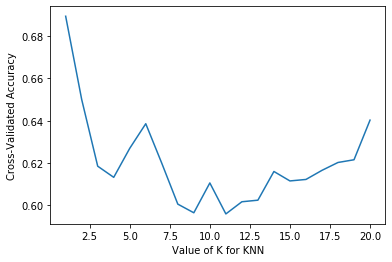

In [11]:
# choose k between 1 to 21
k_range = range(1, 21)
k_scores = []
# use iteration to caclulate different K's in model, then return the average accuracy based on the cross validation
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN, x, y,cv=8)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Predictions using the test data set

In [12]:
# Create a final model and predict
KNN_Final = KNeighborsClassifier(n_neighbors=1)
KNN_Final.fit(x,y)
y_test_hat = KNN_Final.predict(x_test)
y_test_hat

array([2, 5, 2, 2, 2, 2, 2, 1, 6, 2, 2, 5, 7, 2, 2, 1, 5, 1, 1, 2, 5, 7,
       2, 7, 2, 1, 7, 1, 2, 1, 2, 2, 1, 1, 3, 7, 3, 2, 2, 2, 3, 5, 1],
      dtype=int64)

In [13]:
#Actual y- test values
pd.array(y_test)

<PandasArray>
[2, 5, 2, 2, 2, 2, 2, 1, 6, 2, 2, 5, 7, 2, 2, 1, 5, 1, 1, 2, 5, 7, 2, 7, 2, 1,
 7, 1, 2, 1, 2, 2, 1, 1, 3, 7, 3, 2, 2, 2, 3, 5, 1]
Length: 43, dtype: int64

In [14]:
#Finding the accuracy of predictions by comparing the actual and predicted values
test_accuracy = accuracy_score(y_test,y_test_hat)*100
test_accuracy

100.0

## Conclusion:

#### Based on the above observations, our final model is able to predict the type of glass accurately by using the given features.